# Create a metapopulation

We create a metapopulation in just the same way as [creating a simple population](create-population.ipynb) by specifying its transmission history and invoking cs.Population(). It becomes labelled as a metapopulation when we [create a subpopulation](create-subpopulation.ipynb).    

If we want to take account of historical patterns of parasite dispersal across the global metapopulation, a useful shortcut is to use the `coalestr.species()` function to construct a toy model of the emergence and expansion of *Plasmodium falciparum* as a species.  The model has three phases:

1. a small founder population emerging approximately 15,000 years ago

1. an exponential growth phase beginning approximately 10,000 years ago

1. reaching a plateau of $N_h \approx 15000$

This gives a contemporary parasite population with a mean coalescence time of ~18,000 generations (assuming a generation time of 3 months) and a nucleotide diversity of $\pi \approx 4 \times 10^{-4}$.

The model has default parameter settings which can be modified using keyword arguments as shown below.

* Founder phase
  * founder_duration = 1000 (duration of the founder phase)
  * founder_N = 10
  * founder_Q = 3
  * founder_X = 0
    
* Exponential growth phase
  * R0 = 1.0003
  * expansion_Q = 10
  * expansion_X = 0.1
    
* Plateau phase
  * plateau_duration = 1000 (duration of the plateau phase)
  * plateau_N = 15000
  * plateau_Q = 10
  * plateau_X = 0.1

In [ ]:
!pip install coalestr
from coalestr import cs

In [2]:
my_metapopulation = cs.species()

my_metapopulation.get_coalescent()

my_metapopulation.get_diversity()

Observation time.    Events captured.   Mean coalescence time
                      beho      wiho        beho     wiho
        0             100.0     100.0     17961.7   6421.2
Observation time.  Nucleotide diversity     Haplotype homozygosity
                      beho       wiho           beho       wiho
        0           3.95e-04   1.41e-04       3.23e-03   5.92e-01


Above we see that the default model gives a nucleotide diversity of 3.95e-4 in the current parasite population, and within-host nucleotide diversity of 1.41e-4.

Let us look at time series data showing how nucleotide diversity builds up in the global metapopulation over time.

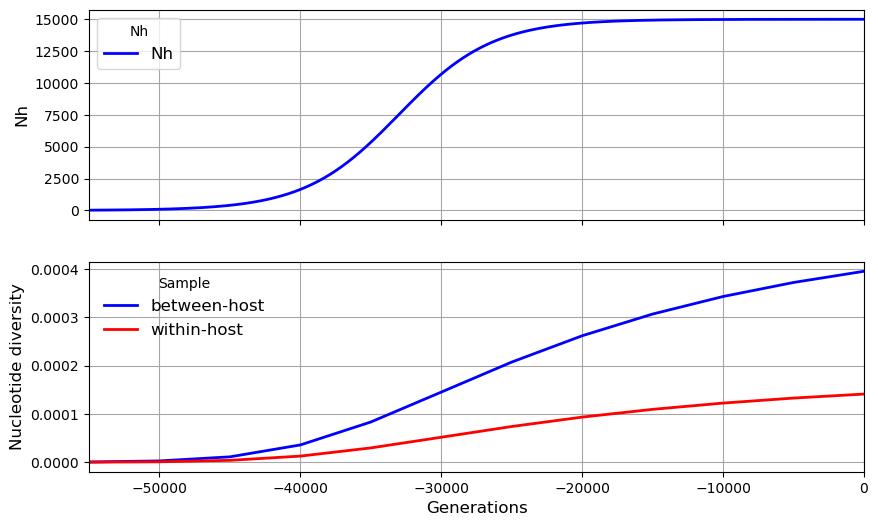

In [3]:
history = my_metapopulation.t_his

observe = [x for x in range(0,history,5000)]

my_metapopulation.get_coalescent(observe, show = False)
my_metapopulation.get_diversity(show = False)
my_metapopulation.plot_observations(metrics = ("Nh", "snp_het",))

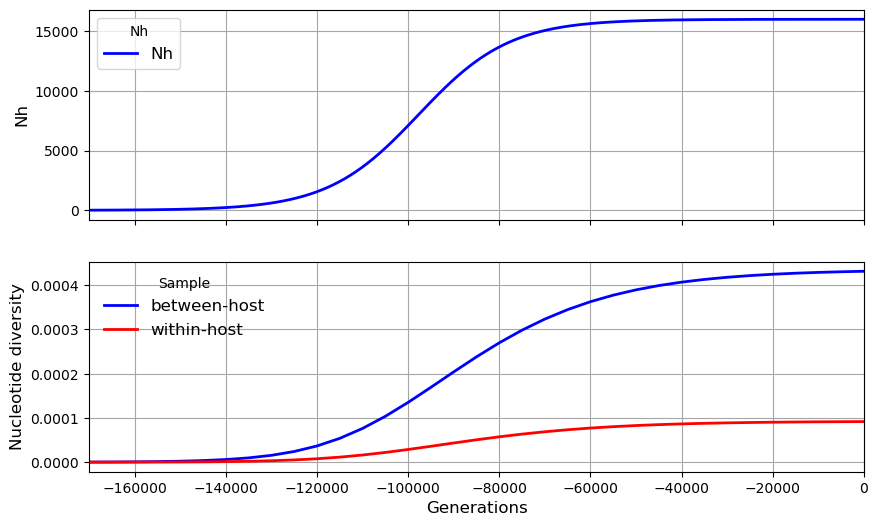

In [4]:
# Here we modify some of the default parameters

my_metapopulation = cs.species(
    founder_duration = 1000, 
    founder_N = 10,
    founder_Q = 3,
    founder_X = 0,
    R0 = 1.0001,
    expansion_Q = 10,
    expansion_X = 0.05,
    plateau_duration = 1000,
    plateau_N = 16000,
    plateau_Q = 10,
    plateau_X = 0.05)

history = my_metapopulation.t_his

observe = [x for x in range(0,history,5000)]
my_metapopulation.get_coalescent(observe, show = False)
my_metapopulation.get_diversity(show = False)
my_metapopulation.plot_observations(metrics = ("Nh", "snp_het",))